<a href="https://colab.research.google.com/github/janchorowski/dl_uwr/blob/summer2021/Assignments/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

**Submission deadlines:**
- get at least 4 points by Tuesday, 11.05.2021
- remaining points: last lab session before or on Tuesday, 18.05.2021

**Points:** Aim to get 12 out of 15+ possible points


## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problem 1: Word Embeddings [4p]

Many natural language processing tasks requrie continuous representations for words.
[Word embeddings](https://en.wikipedia.org/wiki/Word_embedding) are mappings from a discrete
space to real-valued vectors. Word embeddings might be trained with neural networks,
either as a by-product of other tasks (e.g., language modeling, neural machine translation),
or with networks designed specifically for the word embedding task.

Two problems associated with training neural word embeddings are related to the speed of training:
(a) large volume of data, on which the network has to be trained on, and (b) time required to compute
output probability distribution over large vocabularities.

One of the most popular architectures for training word embeddings is called Word2vec [[1]()], [[2]()]. It builds on the idea that semantics of a word can be defined through the contexts,
in which the word appears in the sentence.

Let $w_1, w_2,\ldots,w_N$ be an $N$-word sentence in a natural language.
We define a context of a word $w_l$ a list of $n$ preceeding and following words
$w_{l-n},\ldots,w_{l-1},w_{l+1},\dots,w_{l+n}$.

The underlying assumption is that similar words appear in similar contexts.
For instance, words *Poland* and *Monaco* are similar in a sense, that they are singular nouns
describing abstract concepts of existing, european countries.
We can convince ourselves by looking at exceprts from Wikipedia articles
on Poland and Monaco:

* Despite **Monaco's independence** and separate foreign policy
* aimed to preserve **Poland's independence** and the szlachta's

* **Monaco joined the** Council of Europe in 2004
* **Poland joined the** Schengen Area in 2007

* nearly one-fifth **of Poland's population** – half of them
* Christians comprise a total of 83.2% **of Monaco's population**.

### Tasks
You will use word vectors pre-computed on a large dataset.
1. **[1p]** It has been observed, that word embeddings allow to perform semantic arithmetic where, for instance

    **king** - **man** + **woman** ~= **queen**

    This *analogy* task is often used as a quality measure of word embeddings. Load word embeddings and compute
    their analogy score on a dataset of analogous pairs, expressed as an accuracy of accuracy of predicting a pair
    item (**queen** in the example above). Specifically, compare `FastText` and `Word2vec` word embeddings.
    
2. **[1p]** Word embedding capture approximate semantics. Under an assumption that words of similar semantics
    exist in different languages, a mapping $W: \mathbb{R}^{300}\mapsto\mathbb{R}^{300}$ might be constructed that
    translates word embeddings between languages. It has been shown that such ortonormal mappings allow to express
    approximate, bilingual dictionaries. In addition, non-linear mappings do not offer additional benefits.

    Given a simple English-Polish dictionary of word pairs (sourced from Wikitionary)
    find an orthonormal mapping $W$ between English and Polish `FastText`
    word embeddings using Procrustes analysis.

3. **[1p]** Word embeddings can often be nicely visualized.
    Make a 2-D `PCA` plot of word embeddings for countries and their capital cities
    for `FastText` or `Word2vec`. Connect each country with its capital city with a line segment.
    Can you see any regularities?
    
4. **[1p]** Plot 400 roughly most frequent words' embeddings (either `FastText` or `Word2vec`) in 2-D with `PCA`.
    Skip stop words, punctuations, artifact words, etc. You can be imprecise and use heuristics
    (e.g., select words than are at lest 3 charactes long).
    Can you see any regularities? Another method of making meaningful visualizations is `t-SNE`.
    
    Make another 2-D visualization, this time using `t-SNE`. Visualizations with `t-SNE` are obtained
    with gradient descent. Try to tweak optimization parameters to get lower optimization error,
    than the one with default parameters.
    Can you see any regularities this time?

# Problem 2: kNN Talker [11p+]

In this exercise you will build a simple chatbot that uses distributed representations of words and sentences to perform a nearest neighbor selection of responses.

We have collected two sets of data:
- `./reddit_pairs.txt` of excerpts of [Reddit](https://www.reddit.com/) conversations,
- `./hackernews_pairs.txt` of excertps from [Hackernews](https://news.ycombinator.com/).

The two corpuses are formatted as `tab`-separated pairs of utterances: a `prompt` and a `response`. Successive lines belong to different conversations.

The main idea of the chatbot is to build a representation of the user `input` and of all `prompts` from the corpus. Then select the best (or randomly one of the top few) matches and print the associated `response`.

The key to get the bot working is to create good sentence representations. We will try:
- averaging word embeddings
- using sentence models such as BERT.

### Warning:
The Reddit corpus may contain abusive language, it was not heavily cleaned.

### Tasks
The code below is a starting point, but you can develop you own. The following list suggests some actions to try, along with the points that reflect our subjective hardness. The exercise is worth 6 regular points (i.e. the report, word embedding-based model and BERT-based model), anything on top of it will be counted as a bonus.

1. [2p] Type in a Markdown cell a report of your actions, what did you try, why, what was the result. Show exemplary conversations (they must be probable under your model). Cherry-pick 3 nice dialogues.
2. [2p] Represent sentences by averaging their word vectors. Properly handle tokenization (you can use regular expressions or e.g. `nltk` library). Describe how you handle lower and upper cased words. Try a few nearest neighbor selection methods (such as euclidean or cosine distance). See how embedding normalization affects the results (you can normalize individual word vectors, full sentence vectors etc.).
3. [2p] Use the [transformers](https://huggingface.co/transformers) package to load a pretrained BERT model. Use it to represent sentences by e.g. averaging the activations in the last layer.
4. [1p] Incoportate context: keep a running average of past conversation turns.
5. [1p] Do data cleaning (including profanieties), finding rules for good responses.
6. [1p] Try mixing different sentence representation techniques.
7. [2p] Try to cluster responses to the highest scored prompts. Which responses are more funny: from the largerst or from the smallest clusters?.
8. [1p+] Implement your own enhancements.


# Starter code

In [1]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.

# Download word vectors
# !pip install -q gdown httpimport
![ -e word2vec.tar.xz ] || gdown 'https://drive.google.com/uc?id=1v6D8IjYVFlonhQuN_J3PML5KSVQSpbED' -O word2vec.tar.xz
![ -d word2vec ] || tar Jxf word2vec.tar.xz

# Download conversation corpuses
![ -e  hackernews_pairs.txt ] || gdown 'https://drive.google.com/uc?id=10cp2maNp1suzc5BaFQwDJr2GTKXHQOz_' -O hackernews_pairs.txt
![ -e  reddit_pairs.txt ] || gdown 'https://drive.google.com/uc?id=1Uf0Xl9aqQVBBpOwhYTV7iWCwj95FDqtL' -O reddit_pairs.txt

In [6]:
# Huggingface Transformers implementation
!pip install -q tqdm boto3 requests regex sentencepiece sacremoses
!pip install -q transformers

In [8]:
!pip install -q nltk

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
!pip install -q gensim
!pip install -q tabulate

In [3]:
import collections

import codecs

import numpy as np
from scipy.linalg import orthogonal_procrustes
from scipy.spatial import distance

import nltk
import sklearn
nltk.download('punkt')

import pprint
import gensim

import io
from tqdm.autonotebook import tqdm


import torch

import scipy.sparse as sparse
import tabulate

[nltk_data] Downloading package punkt to /home/i309016/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/pio/scratch/1/i309016/miniconda/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
<ipython-input-3-f5aa4b1aad01>:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1.1: Analogies

In [4]:
# Word embeddings assign a vector to each word. To use them we need three things:
# 1. the embeddings themselves
# 2. a dictionary from words to their embedding ids
# 3. an inverse dictionary

Embedding = collections.namedtuple(
    'Embedding',
    ['vec', 'word2idx', 'idx2word'])

In [5]:
def load_vecs_npy(base_path):
    """Load small embeddings in .npy format."""
    vec = np.load(base_path + '.npy')
    idx2word = [l.strip() for l in codecs.open(
                      base_path + '.txt', 'r', 'utf-8')]
    word2idx = {w:i for (i,w) in enumerate(idx2word)}
    return Embedding(vec, word2idx, idx2word)

In [177]:
# Load top 200k word embeddings: Word2vec and FastText
word2vec = load_vecs_npy('word2vec/word2vec_GoogleNews_200k')
ftext = load_vecs_npy('word2vec/fasttext_wikien_200k')

In [7]:
def load_analogies():
    '''Load tuples of analogies, e.g., (man, woman, king, queen)'''
    questions_path = 'word2vec/questions-words.txt'
    analogies = [l.strip().split() for l in open(questions_path, 'r') \
                 if not l.startswith(':')]
    return analogies

In [8]:
def eval_analogies(vecs, analogies):
    """
    Compute the accuracy on the analogy task.
    
    In the task, quadruples of words are given (q1, q2, r1, r2).
    The words q1 and q2 are bound by a relation. The words r1 and r2 
    are bound by the same relation. The task is to predict r2 knowing words
    q1, q2, and r1.
    
    Example:
    Quadruple [King, Queen, Man, Woman] yields the question
    King is to Queen as Man is to ????
    
    Args:
        word_vecs: Embeddings tupes
        analogies: list of quadruples: (q1, q2, r1, r2)
        
    Returns:
        percentage of correct answers
    """
    indexes = [[vecs.word2idx.get(w, None) for w in tupl] \
                for tupl in analogies]
    indexes = [tupl for tupl in indexes \
               if all([v is not None for v in tupl])]
    # indexes holds quadruples of ints giving the ids of words from our vocab.
    indexes = np.asarray(indexes)
    print('Got vocab for %d/%d pairs' % (indexes.shape[0], len(analogies)))
    
    # Extract the vectors for the query words
    q1 = vecs.vec[indexes[:, 0]]
    q2 = vecs.vec[indexes[:, 1]]
    r1 = vecs.vec[indexes[:, 2]]
    
    # Extractr the word IDs for the correct answers
    r2_inds = indexes[:, 3]

    #
    # TODO 
    #
    # Compute the approximate location of word r2 as r2 = r1 + (q2 - q1)
    # Find the word closest to this location using cosine distance.
    # Return it's id and compute the accurracy.
    #

    r2_pred = r1 + (q2-q1)
    
    
    # Normalize length and compute dot product between r2_pred and word_vecs
    # to get cosine distance
    r2_pred_norm = r2_pred / np.sqrt(np.sum(r2_pred**2, axis=1, keepdims=True))
    vecs_norm = vecs.vec / np.sqrt(np.sum(vecs.vec**2, axis=1, keepdims=True))
    
    # Compute in chunks to save memory
    r2_pred_inds = np.concatenate([np.argmax(r2_pred_norm[i:i+1000].dot(vecs_norm.T), axis=1) \
                                   for i in range(0, r2_pred.shape[0], 1000)])
    return 100.0 * (r2_pred_inds == r2_inds).sum() / r2_inds.shape[0]

In [9]:
# Load analogy tuples, e.g., (man, woman, king, queen)
analogies = load_analogies()

# Some are uppercased geographical names (and FastTexts are lowercased)
analogies_lower = [[w.lower() for w in tupl] for tupl in analogies]

print(analogies[0])
print(analogies_lower[0])

['Athens', 'Greece', 'Baghdad', 'Iraq']
['athens', 'greece', 'baghdad', 'iraq']


In [71]:
# Keep in mind that the vocab is restricted to 200k most freq words
# (in the training corpus!)
print('FastText analogy task accuracy:')
print('-------------------------------')
# Fast-text was trained on lowercased text only
print(eval_analogies(ftext, analogies_lower), '% correct')

print('\nWord2vec analogy task accuracy:')
print('-------------------------------')
# Word2vec has case information
print(eval_analogies(word2vec, analogies), '% correct')

FastText analogy task accuracy:
-------------------------------
Got vocab for 19420/19544 pairs
16.374871266735326 % correct

Word2vec analogy task accuracy:
-------------------------------
Got vocab for 18783/19544 pairs
20.859287653729435 % correct


## 1.2: translation through alignment of vector spaces

In [72]:
# We're need Polish embeddings
ftext_pl = load_vecs_npy('word2vec/fasttext_wikipl_200k')

# Load a simple wikitionary-based dict of word pairs
en_pl = [l.strip().split('\t') for l in codecs.open(
    'word2vec/word2vec_en_pl', 'r', 'utf-8') if not '<UNK>' in l]
en_pl = {t[0]:t[1] for t in en_pl if len(t) == 2}

# Keep those, for which we have embeddings
en_pl = {en:pl for (en,pl) in en_pl.items() \
         if en in ftext.word2idx and pl in ftext_pl.word2idx}
print('Dictionary size:', len(en_pl))
print('good --', en_pl['good'])

Dictionary size: 750
good -- dobro


In [73]:
# Select word embeddings for dictionary words
en_words = sorted(en_pl.keys())
V_en = ftext.vec[[ftext.word2idx[w] for w in en_words]]
V_pl = ftext_pl.vec[[ftext_pl.word2idx[en_pl[w]] for w in en_words]]
print(V_en.shape, V_pl.shape)

(750, 300) (750, 300)


In [74]:
# Find an orthogonal transformation from V_en to V_pl.
# which minimizes square reconstruction error
W = orthogonal_procrustes(V_en, V_pl)[0]

In [84]:
def translate(W, v, vecs2):
    #
    # TODO
    #
    # Transform source word vector v using W getting a location in target space.
    # Find the closest word in target space using the cosine distance.
    #
    v_transf= v@W
    v_transf_norm= v_transf / np.sqrt(np.sum(v_transf**2))
    vects2_norm= vecs2.vec / np.sqrt(np.sum(vecs2.vec**2, axis=1, keepdims=True))
    idx=np.argmax(v_transf_norm@vects2_norm.T)
    return vecs2.idx2word[idx]

# Select random, fairly frequent words not from the dictionary
tr_words = [i for i in np.random.randint(1000, 2000, 100) \
            if ftext.idx2word[i] not in en_pl]
tr_words = tr_words[:20]

rows = [[ftext.idx2word[i], translate(W, ftext.vec[i], ftext_pl)] \
         for i in tr_words] 
print(tabulate.tabulate(rows))

------------  ---------------
provides      dostarcza
none          nie
independence  suwerenności
actual        oczywisty
avoid         unikać
comes         wychodzi
typically     zwykle
en            ziółka
scale         kalkulacyjny
defined       definiowany
runs          biec
females       samce
ocean         morza
£             kwotę
latter        ten
girls         dziewczynka
vocals        klawiszowe
races         wyścig
champion      wicemistrzostwa
vs            pojedynek
------------  ---------------


## 1.3: PCA

In [85]:
capitals = [l.strip().split('\t') for l in codecs.open('word2vec/countries_capitals', 'r', 'utf-8')]
capitals = {country:capital for (country,capital) in capitals}

# Select those present in Word2vec vocab
capitals = {k:v for (k,v) in capitals.items() \
            if k in word2vec.word2idx and v in word2vec.word2idx}

# Flatten the array to have a list of [country, capital, country, capital, ...]
geo = [e for pair in capitals.items() for e in pair]
print(len(geo) // 2, 'pairs', geo[:6])

131 pairs ['Afghanistan', 'Kabul', 'Albania', 'Tirana', 'Algeria', 'Algiers']


In [86]:
geo_inds = [word2vec.word2idx[w] for w in geo]
geo_vecs = word2vec.vec[geo_inds]
print(geo_vecs.shape)

(262, 300)


In [90]:
from sklearn.decomposition import PCA

#
# TODO
# use PCA from sklearn.decomposition to project the countries and capitals into 2D.
# draw lines connecting each country with its capital
#
# Hint:
# - the function "annotate" can be used to put text onto the plot
#

pca=PCA(n_components=2)
dane=pca.fit_transform(geo_vecs)

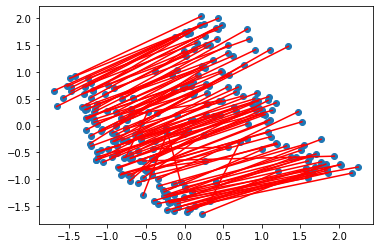

In [103]:
#plt.gcf().set_size_inches((10,10))
plt.scatter(dane[:,0],dane[:,1])
for i in range(0,dane.shape[0],2):
    plt.plot([dane[i,0],dane[i+1,0]],[dane[i,1],dane[i+1,1]],"red")

## 1.4: PCA vs t-SNE on frequent words

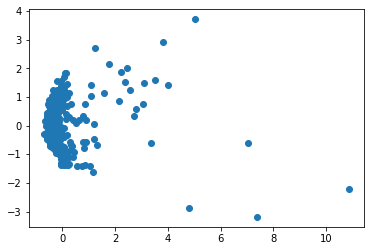

In [110]:
# Select words starting from the 200th to ommit stop words,
# which have at least 3 chars
top_words = [w for (i,w) in enumerate(ftext.idx2word) \
             if i > 200 and len(w) >= 3][:400]
top_inds = [ftext.word2idx[w] for w in top_words]


#
# TODO: make a 2D PCA projection of the selected words.
#
zanurzenie=ftext.vec[top_inds]
pca=PCA(n_components=2)
dane=pca.fit_transform(zanurzenie)
plt.scatter(dane[:,0],dane[:,1])

/pio/scratch/1/i309016/miniconda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


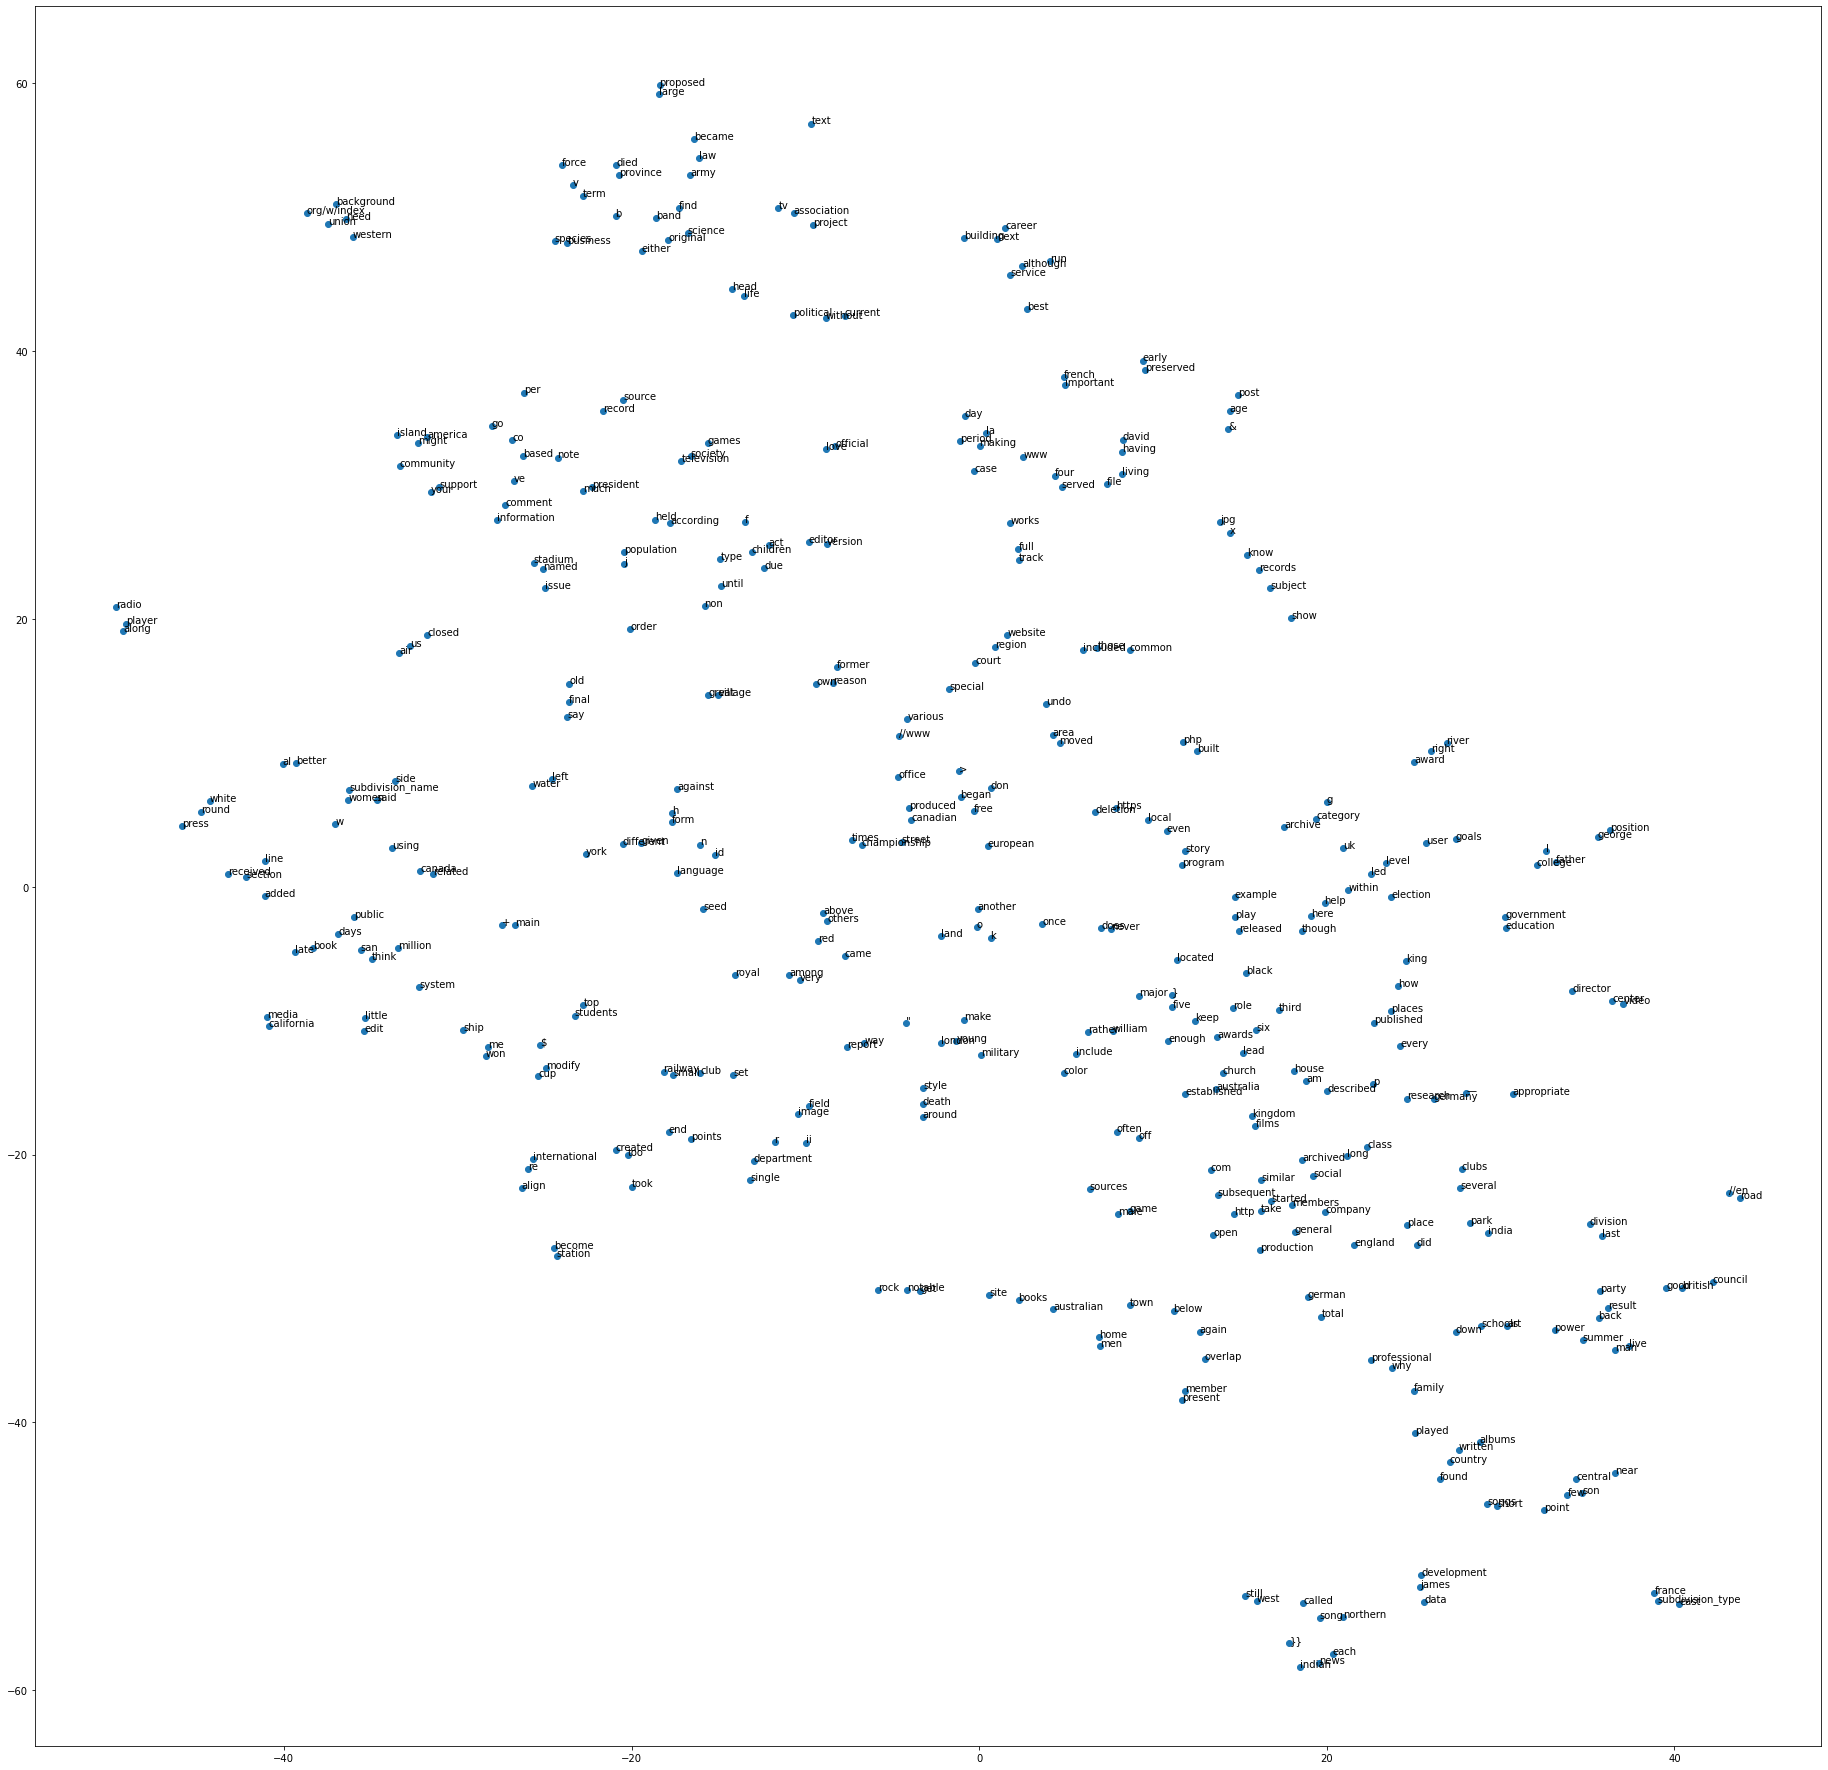

In [134]:
from sklearn.manifold import TSNE

#
# TODO: make a 2D t-SNE projection of the selected words.
# Things will cluster much nicer
#

tsne=TSNE(n_components=2, n_jobs=4, learning_rate=150, metric="cosine", perplexity=10)
dane=tsne.fit_transform(zanurzenie)

plt.gcf().set_size_inches((32,32))
plt.scatter(dane[:,0],dane[:,1])
for i in range(200,600):
    plt.annotate(ftext.idx2word[i],dane[i-200,:])
plt.savefig("tsneWordEmbed.png")

## Problem 2

In second task we have to create simple chat bot using diffrent methods. I use 3 embedding methods:
- word counting
- word embeding using word2vec
- sentence tokenization and embeding using BERT model

Embeding using word count got pretty good results, but there are rather generic:
- "C++ is best language"
- 'Yes, python.'
- "But i have said that C++ is best."
- 'This kind of commentary is not welcome.'
- "Why i can not like c++?"
- 'One neuron dying off is much more probable than a fatal heart condition.'

Embeding using word2vec were the worst from 3 methods, there were mayby a little more tematic, but there was such big problems with passing reply to prompt, that such dialog is preatty syntetic:
- "C++ is best language"
- 'Go websites are essentially long running processes.'
- "But i have said that C++ is best."
- "If a whiteboard can be accurately captured digitally, I'd say that it's better."
- "Why i can not like c++?"
- "It sounds like you've never been a part of a forum or similar a decade ago."

As we can predict best results were with BERT model, but there is o con, that creating an embeding is long process over 1 hour, but it can be enchanced.

- "C++ is best language"
- 'Are you suggesting those as counterexamples?'
- "But i have said that C++ is best."
- 'I agree with you.'
- "Why i can not like c++?"
- 'Probably because of the relative evangelism levels.'

Additionaly there were made tests for each embedding method using cosine distance and euclidean distance, but diffrences between them wasn't significant (from time to time there was diffrent ordering of some sentences in set of best prompts, but changing content of the set is unlikely).

Additionaly there were made tests with normalization or not of embedings. When encodings of dictionary are normalized (such as in count ebeding or in word2vec), than normalization of sentence to which we are looking for answer dosen't play big role. On the other hand normalization of encodings in dictionary is crutial to have correctly working chat system, because without normalization we always get as best prompts which has the biggest leght in embedding instead of most correlated. For example when we have sentence which has big number of tokens, then we have more tokens embeding, so summation over many embeding vectors give us vector which has big pointweise values, so it is long. 

Another improvment was to add avaraging of the last view queries. It fullfiel it duty to save the context of the dialog, but on the other hand when seqently queries were simmilar one to another set of possible answer was pretty small.

The gretest improvment was to add clustering of responses using KMeans, thanks for that we got more deterministic choosing of answer, which in overall is more specyfic and fitted.

In [10]:
prompts = []
responses = []
err_lines = []
with open('./hackernews_pairs.txt') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        line = line.split('\t')
        if len(line)!=2:
            err_lines.append(line)
        else:
            prompts.append(line[0])
            responses.append(line[1])
print(f"Failed to parse the following {len(err_lines)} lines: {err_lines}") 
print(f"Sample fialogue pairs: \n{pprint.pformat(list(zip(prompts[:15], responses)))}")

Failed to parse the following 0 lines: []
Sample fialogue pairs: 
[('Ah, yep, that was the issue.',
  'Yeah, options typically cost the company very little.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Oh, I see.'),
 ("Cross multiplication is a trick to multiply by the 'reciprocal' of the "
  'fraction.',
  'Whaaa?'),
 ('Quite cool.', 'It gets into a pretty philosophical area.'),
 ("If only the packaging smells, then I agree, it's not damaged.",
  'Sounds like entitlement to me.'),
 ("That's what nationalist politics always says.", 'Can you prove that?'),
 ('Misleading title.', 'Not really.'),
 ('Misleading title.',
  'It is not completely misleading to all users but enough for me to say '
  'something.'),
 ('Why the hell is this getting downvoted?',
  "Because it's clear the person he's responding to understood that "
  'relationship.'),
 ("There's a web without ads.",
  'This just came to mind when you mentioned "ad tax".'),
 ('God 

In [11]:
class BasicEncoder:
    def encode(self, sentence):
        # this is a base class!
        raise NotImplementedError

    def encode_corpus(self, sentences):
        ret = [self.encode(sentence) for sentence in tqdm(sentences)]
        return np.vstack(ret)

The code below implements a simple baseline: we encode each sentence as a sparse vector which sums word occurrences.

In [474]:
class OneHotEncoder(BasicEncoder):
    def __init__(self, sentences, token_pattern=None):
        if token_pattern is not None:
            self.vectorizer = sklearn.feature_extraction.text.CountVectorizer(token_pattern=token_pattern)
        else:
            self.vectorizer = sklearn.feature_extraction.text.CountVectorizer()    
        self.vectorizer.fit(sentences)
    
    def encode(self, sentence):
        return self.vectorizer.transform([sentence])[0]

    def encode_corpus(self, sentences):
        # Override because sklearn already works on batches
        encodings = self.vectorizer.transform(sentences)
        # Note: this code needs to handl the scipy sparse matrix
        # which has subtle differences with numpy ndarrays
        norms = np.array((encodings.power(2)).sum(1))**0.5
        encodings = encodings.multiply(1.0 / norms)
        return encodings

encoder = OneHotEncoder(prompts)
encodings = encoder.encode_corpus(prompts)

prompt = "Ultimate question: Windows or Linux?"
enc = encoder.encode(prompt)

# Deal with encodings being sparse matrices. Word2vecs will not have the pecularities
scores = (encodings @ enc.T).toarray().ravel()
top_idx = scores.argsort()[-10:][::-1]

for idx in top_idx:
    print(scores[idx], prompts[idx], ':', responses[idx])

1.0 Question. : In a sense 'maybe not'.
1.0 Linux? : Unfortunately not.
1.0 Windows? : Unix based systems
1.0 Question. : This is a good question!
0.8017837257372732 Hardware or software or technique or best practices... : Mobile phones that still work when you drop them.
0.8017837257372732 Hardware or software or technique or best practices... : Floppy disk and cd/dvd drives!
0.8017837257372732 Hardware or software or technique or best practices... : Building your own desktop.
0.8017837257372732 Hardware or software or technique or best practices... : Extreme programming.
0.8017837257372732 Hardware or software or technique or best practices... : Zip drives.
0.8017837257372732 Hardware or software or technique or best practices... : It can all go.


<ipython-input-474-16bb5b082a14>:18: RuntimeWarning: divide by zero encountered in true_divide
  encodings = encodings.multiply(1.0 / norms)


In [471]:
# TODO: build a simple dialogue system using these k-neares neighbor matches, 
# perform a few test conversations
class Dialog:
    def __init__(self, encodings, encoder, responses, normalize=False, metryka="cos"):
        self.normalize=normalize
        self.encoded_corpus=encodings
        self.encoder=encoder
        self.responses=responses
        self.metryka=metryka
    
    def krokDialogu(self, zdanieWejsciowe):
        odpowiedzi=self.zwrocNajlepszeOdpowiedzi(zdanieWejsciowe)
        idx=np.random.randint(0,len(odpowiedzi))
        return odpowiedzi[idx]
    
    def zwrocNajlepszeOdpowiedzi(self, zdanieWejsciowe):
        enc=self.encoder.encode(zdanieWejsciowe)
        
        if self.normalize:
            enc=enc.multiply(1.0 / np.array((enc.power(2)).sum(1))**0.5)
            
        if self.metryka=="cos":
            scores = (self.encoded_corpus @ enc.T).toarray().ravel()
        elif self.metryka=="euklides":
            scores= -np.sqrt(np.array((self.encoded_corpus.tocsr() -
                sparse.csr_matrix(np.ones((self.encoded_corpus.shape[0],1))).dot(enc)).power(2).sum(1))).ravel()
        else:
            raise RuntimeError("Błędna metryka.")
        top_idx = scores.argsort()[-10:]
        return [self.responses[idx] for idx in top_idx]

#### Ogległość cosinusów

###### Bez normalizacji

In [166]:
d=Dialog(encodings, encoder, responses)

In [21]:
d.krokDialogu("C++ is best language")

'Yes, python.'

In [25]:
d.krokDialogu("But i have said that C++ is best.")

'This kind of commentary is not welcome.'

In [26]:
d.krokDialogu("Why i can not like c++?")

'One neuron dying off is much more probable than a fatal heart condition.'

In [167]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['I can see how that would work for stateless services.',
 'You continue to be amazed?',
 'Yes, python.',
 'Is there some language where [4,6] is the output?',
 'Go websites are essentially long running processes.',
 "I'm not sure either.",
 'and that type is the string.',
 'The last two points are extremely debatable.',
 'This.',
 'This make a lot of sense to me.']

###### Z normalizacją (jednak nie wprowadza ona dużej różnicy)

In [168]:
d=Dialog(encodings, encoder, responses, normalize=True)

In [32]:
d.krokDialogu("C++ is best language")

'Yes, python.'

In [37]:
d.krokDialogu("But i have said that C++ is best.")

'This kind of commentary is not welcome.'

In [43]:
d.krokDialogu("Why i can not like c++?")

'One neuron dying off is much more probable than a fatal heart condition.'

In [169]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['I can see how that would work for stateless services.',
 'You continue to be amazed?',
 'Yes, python.',
 'Is there some language where [4,6] is the output?',
 'Go websites are essentially long running processes.',
 "I'm not sure either.",
 'and that type is the string.',
 'The last two points are extremely debatable.',
 'This.',
 'This make a lot of sense to me.']

###### Inne odpowiedzi

In [35]:
d.krokDialogu("But i have said that C++ is best.")

'The big clue was missing definite articles (a, the, etc.)'

In [38]:
d.krokDialogu("Why i can not like c++?")

'I laughed heartedly thinking this is sarcasm.'

#### Odległość euklidesowa

In [476]:
d=Dialog(encodings, encoder, responses, normalize=False, metryka="euklides")

In [482]:
d.krokDialogu("C++ is best language")

'Is there some language where [4,6] is the output?'

In [483]:
d.krokDialogu("But i have said that C++ is best.")

"Why's that?"

In [484]:
d.krokDialogu("Why i can not like c++?")

'Why would you ever need uncompressed bitmaps?'

In [480]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['You continue to be amazed?',
 'I can see how that would work for stateless services.',
 'Yes, python.',
 'Is there some language where [4,6] is the output?',
 "I'm not sure either.",
 'Go websites are essentially long running processes.',
 'and that type is the string.',
 'The last two points are extremely debatable.',
 'This.',
 'This make a lot of sense to me.']

###### Inne odpowiedzi

In [493]:
d.krokDialogu("C++ is best language")

'and that type is the string.'

In [491]:
d.krokDialogu("But i have said that C++ is best.")

'That\'s less a "rationale" and more a "cause," though.'

In [492]:
d.krokDialogu("Why i can not like c++?")

"I'm in the neighborhood and have been thinking about making the trip."

##### Z normalizacją

In [494]:
d=Dialog(encodings, encoder, responses, normalize=True, metryka="euklides")

In [495]:
d.krokDialogu("C++ is best language")

'Is there some language where [4,6] is the output?'

In [496]:
d.krokDialogu("But i have said that C++ is best.")

'Thank you for writing out such a detailed and insightful reply.'

In [499]:
d.krokDialogu("Why i can not like c++?")

"The same reason unicorns and fairies don't exist."

In [498]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Smalltalk.',
 'I can see how that would work for stateless services.',
 'Is there some language where [4,6] is the output?',
 'Yes, python.',
 'Go websites are essentially long running processes.',
 'and that type is the string.',
 "I'm not sure either.",
 'This make a lot of sense to me.',
 'This.',
 'The last two points are extremely debatable.']

###### Inne odpowiedzi

In [497]:
d.krokDialogu("Why i can not like c++?")

'I used to occasionally game banks for their account sign-up bonuses.'

#### Inna tokenizacja

In [174]:
encoder = OneHotEncoder(prompts, token_pattern=r"(?u)\b\S\S+\b")
encodings = encoder.encode_corpus(prompts)

<ipython-input-165-16bb5b082a14>:18: RuntimeWarning: divide by zero encountered in true_divide
  encodings = encodings.multiply(1.0 / norms)


In [175]:
d=Dialog(encodings, encoder, responses, normalize=True, metryka="euklides")

In [154]:
d.krokDialogu("C++ is best language")

"Whoops, you're right."

In [156]:
d.krokDialogu("But i have said that C++ is best.")

'You can re-phrase it and use that anywhere.'

In [163]:
d.krokDialogu("Why i can not like c++?")

'Agreed.'

In [176]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['The alternative to crashing is exiting cleanly with an error.',
 'There is nothing wrong with crashing if you can do it in a "safe" manner.',
 'Video can often come from a less than perfectly reliable source (eg.',
 "It's built into many products and workflows that accept user submitted content.",
 "What's yield on green?",
 'Or even just the  size  of the source code!',
 "Whoops, you're right.",
 'They are: 1.',
 'Sorry, I had hoped the rest of my comment would make my intention clear.',
 'Embrace it and see how society will change from it.']

###### Inne odpowiedzi

In [159]:
d.krokDialogu("Why i can not like c++?")

"You're confusing the math with the reason they stop taking external funds."

In [161]:
d.krokDialogu("But i have said that C++ is best.")

'Go exercise somewhere outside.'

In [148]:
d.krokDialogu("C++ is best language")

'The alternative to crashing is exiting cleanly with an error.'

In [147]:
d.krokDialogu("C++ is best language")

"What's yield on green?"

### Word2vec

In [500]:
class Word2VecEncoder(BasicEncoder):
    def __init__(self, vecs):
        self._vecs = vecs

    def _get_vec(self, word):
        # Find the vector for word, or use a suitbale out-of-vocabulary vector
        # For extra points try backing off to a lowercased dictionary
        #print(word, word in self._vecs.word2idx)
        if word in self._vecs.word2idx:
            return self._vecs.vec[self._vecs.word2idx[word]]
        else:
            return 0

    def encode(self, sentence):
        ret = np.zeros(self._vecs.vec.shape[1])
        for token in nltk.tokenize.word_tokenize(sentence):
            word_vec = self._get_vec(token)
            ret += word_vec
            #print(ret)
        ret /= (np.linalg.norm(ret) + 1e-5)
        #print(ret)
        return ret

encoder = Word2VecEncoder(word2vec)

In [501]:
encodings = encoder.encode_corpus(prompts)

In [392]:
# TODO: build a simple dialogue system using these k-neares neighbor matches, 
# perform a few test conversations
class DialogNP:
    def __init__(self, encodings, encoder, responses, normalize=False, metryka="cos", czySrednia=False,
                mnoznik=0.5):
        self.normalize=normalize
        self.encoded_corpus=encodings
        self.encoder=encoder
        self.responses=responses
        self.metryka=metryka
        self.czySrednia=czySrednia
        self.srednia=None
        self.mnoznikSredniej=mnoznik
    
    def krokDialogu(self, zdanieWejsciowe):
        odpowiedzi=self.zwrocNajlepszeOdpowiedzi(zdanieWejsciowe)
        idx=np.random.randint(0,len(odpowiedzi))
        return odpowiedzi[idx]
    
    def zwrocNajlepszeOdpowiedzi(self, zdanieWejsciowe):
        enc=self.encoder.encode(zdanieWejsciowe)
        
        if self.normalize:
            enc=enc / np.sqrt(np.sum(enc**2))
        
        if self.czySrednia:
            if self.srednia is None:
                self.srednia=enc.copy()
            else:
                self.srednia=self.srednia*self.mnoznikSredniej+(1-self.mnoznikSredniej)*enc
                enc=self.srednia.copy()
        
        if self.metryka=="cos":
            scores = (self.encoded_corpus @ enc).ravel()
        elif self.metryka=="euklides":
            scores= -np.sqrt(np.sum((self.encoded_corpus -enc)**2,axis=1)).ravel()
        else:
            raise RuntimeError("Błędna metryka.")
        top_idx = scores.argsort()[-10:]
        return [self.responses[idx] for idx in top_idx]

#### Odległość cosinusów

In [231]:
d=DialogNP(encodings, encoder, responses, normalize=True)

In [234]:
d.krokDialogu("C++ is best language")

'No.'

In [238]:
d.krokDialogu("But i have said that C++ is best.")

"If a whiteboard can be accurately captured digitally, I'd say that it's better."

In [239]:
d.krokDialogu("Why i can not like c++?")

"It sounds like you've never been a part of a forum or similar a decade ago."

In [237]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

["Are you saying that /bin/sh isn't turing complete?",
 'This is 130 lines of code, including whitespace.',
 "Yeah, I think you'll need to be more clear about that.",
 'Haskell has decent experimental support for dependent types.',
 "Ya, apparently it's been around longer than I thought.",
 'No.',
 'Smalltalk.',
 "I'm not sure either.",
 'Go websites are essentially long running processes.',
 'sorry, what do you mean ?']

#### Odległość euklidesowa

In [502]:
d=DialogNP(encodings, encoder, responses, normalize=True, metryka="euklides")

In [503]:
d.krokDialogu("C++ is best language")

'Go websites are essentially long running processes.'

In [504]:
d.krokDialogu("But i have said that C++ is best.")

"If a whiteboard can be accurately captured digitally, I'd say that it's better."

In [507]:
d.krokDialogu("Why i can not like c++?")

"It sounds like you've never been a part of a forum or similar a decade ago."

In [506]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

["Are you saying that /bin/sh isn't turing complete?",
 'This is 130 lines of code, including whitespace.',
 "Yeah, I think you'll need to be more clear about that.",
 'Haskell has decent experimental support for dependent types.',
 "Ya, apparently it's been around longer than I thought.",
 'No.',
 'Smalltalk.',
 'Go websites are essentially long running processes.',
 "I'm not sure either.",
 'sorry, what do you mean ?']

### BERT

In [297]:
from transformers import BertTokenizer, BertModel

In [319]:
tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")
bert=BertModel.from_pretrained("bert-base-uncased")

In [367]:
%%timeit
tokenizer("Zimnokrwisty smok pustynny",return_tensors="pt")

277 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [368]:
T=tokenizer("Zimnokrwisty smok pustynny",return_tensors="pt")

In [369]:
T.input_ids.shape

torch.Size([1, 14])

In [370]:
%%timeit
bert(**T)

82.4 ms ± 44.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [328]:
S2=np.sum(np.array(out.last_hidden_state.detach()), axis=(0,1))

In [324]:
S=np.sum(np.array(out.last_hidden_state.detach()), axis=(0,1))

In [330]:
np.allclose(S,S2)

False

In [303]:
class BertEncoder(BasicEncoder):
    def __init__(self):
        self.tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")
        self.bert=BertModel.from_pretrained("bert-base-uncased")

    def encode(self, sentence):
        tokens=self.tokenizer(sentence, return_tensors="pt")
        out=bert(**tokens)
        ret=np.sum(np.array(out.last_hidden_state.detach()), axis=1)
        ret /= (np.linalg.norm(ret) + 1e-5)
        return ret
    
encoder = BertEncoder()

In [304]:
encodings = encoder.encode_corpus(prompts)

In [373]:
encodings_copy=encodings.copy()

In [381]:
encodings /= (np.linalg.norm(encodings, axis=1, keepdims=True) + 1e-5)

#### Odległość cosinusowa

In [403]:
d=DialogNP(encodings, encoder, responses, normalize=False, metryka="cos")

In [404]:
d.krokDialogu("C++ is best language")

'Are you suggesting those as counterexamples?'

In [412]:
d.krokDialogu("But i have said that C++ is best.")

"It's quite likely that C++ code rendered this web page for you."

In [406]:
d.krokDialogu("Why i can not like c++?")

'Came here to say this.'

In [407]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Reference counting steal cycles all over the place.',
 "I couldn't agree more.",
 'Exactly!',
 'Are you suggesting those as counterexamples?',
 'Visual C++ came after regular C++',
 'C and C++ have both passed the threshold of immortality.',
 'Yet whole applications are written around it and they work perfectly well.',
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Exactly.',
 'Yes.']

###### Normalizacja

In [413]:
d=DialogNP(encodings, encoder, responses, normalize=True, metryka="cos")

In [414]:
d.krokDialogu("C++ is best language")

'C and C++ have both passed the threshold of immortality.'

In [415]:
d.krokDialogu("But i have said that C++ is best.")

'Desktop applications requiring high performance also use C++.'

In [416]:
d.krokDialogu("Why i can not like c++?")

'Probably because of the relative evangelism levels.'

In [417]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Reference counting steal cycles all over the place.',
 "I couldn't agree more.",
 'Exactly!',
 'Are you suggesting those as counterexamples?',
 'Visual C++ came after regular C++',
 'C and C++ have both passed the threshold of immortality.',
 'Yet whole applications are written around it and they work perfectly well.',
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Exactly.',
 'Yes.']

#### Odległość euklidesowska

In [394]:
d=DialogNP(encodings, encoder, responses, normalize=False, metryka="euklides")

In [398]:
d.krokDialogu("C++ is best language")

'Are you suggesting those as counterexamples?'

In [399]:
d.krokDialogu("But i have said that C++ is best.")

'I agree with you.'

In [400]:
d.krokDialogu("Why i can not like c++?")

'Probably because of the relative evangelism levels.'

In [401]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Reference counting steal cycles all over the place.',
 "I couldn't agree more.",
 'Exactly!',
 'Are you suggesting those as counterexamples?',
 'Visual C++ came after regular C++',
 'C and C++ have both passed the threshold of immortality.',
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Yet whole applications are written around it and they work perfectly well.',
 'Exactly.',
 'Yes.']

In [418]:
d=DialogNP(encodings, encoder, responses, normalize=True, metryka="euklides")

In [419]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Immediate cleanup is not necessarily an advantage.',
 "I couldn't agree more.",
 'Exactly!',
 'Are you suggesting those as counterexamples?',
 'Visual C++ came after regular C++',
 'C and C++ have both passed the threshold of immortality.',
 'Yet whole applications are written around it and they work perfectly well.',
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Exactly.',
 'Yes.']

#### Zapamiętywanie średniej kroczącej

In [440]:
d=DialogNP(encodings, encoder, responses, normalize=False, metryka="euklides", czySrednia=True)

In [441]:
d.krokDialogu("C++ is best language")

'Yes.'

In [442]:
d.krokDialogu("But i have said that C++ is best.")

'Exactly.'

In [443]:
d.krokDialogu("Why i can not like c++?")

'I agree, especially for mere mortals.'

In [444]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['I agree, especially for mere mortals.',
 'Came here to say this.',
 'I agree with you.',
 'clang-tidy will fix (some?)',
 'Exactly!',
 "I couldn't agree more.",
 'Yet whole applications are written around it and they work perfectly well.',
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Yes.',
 'Exactly.']

In [450]:
d=DialogNP(encodings, encoder, responses, normalize=False, metryka="cos", czySrednia=True)

In [451]:
d.krokDialogu("C++ is best language")

'As if longjmp and c++ exceptions are the only two ways to go.'

In [452]:
d.krokDialogu("But i have said that C++ is best.")

'Many, if not most desktop applications are written in C++.'

In [453]:
d.krokDialogu("Why i can not like c++?")

'Came here to say this.'

In [454]:
d.zwrocNajlepszeOdpowiedzi("C++ is best language")

['Came here to say this.',
 'I agree, especially for mere mortals.',
 'I agree with you.',
 'clang-tidy will fix (some?)',
 'Exactly!',
 "I couldn't agree more.",
 'As if longjmp and c++ exceptions are the only two ways to go.',
 'Yet whole applications are written around it and they work perfectly well.',
 'Yes.',
 'Exactly.']

### Grupowanie odpowiedzi

In [455]:
from sklearn.cluster import KMeans

In [461]:
# TODO: build a simple dialogue system using these k-neares neighbor matches, 
# perform a few test conversations
class DialogNP:
    def __init__(self, encodings, encoder, responses, normalize=False, metryka="cos", czySrednia=False,
                mnoznik=0.5, czyGrupowanie=False):
        self.normalize=normalize
        self.encoded_corpus=encodings
        self.encoder=encoder
        self.responses=responses
        self.metryka=metryka
        self.czySrednia=czySrednia
        self.srednia=None
        self.mnoznikSredniej=mnoznik
        self.czyGrupowanie=czyGrupowanie
    
    def krokDialogu(self, zdanieWejsciowe):
        odpowiedzi=self.zwrocNajlepszeOdpowiedzi(zdanieWejsciowe)
        if self.czyGrupowanie:
            return self.grupowanieOdpowiedzi(odpowiedzi)
        else:
            idx=np.random.randint(0,len(odpowiedzi))
            return odpowiedzi[idx]
    
    def zwrocNajlepszeOdpowiedzi(self, zdanieWejsciowe):
        enc=self.encoder.encode(zdanieWejsciowe)
        
        if self.normalize:
            enc=enc / np.sqrt(np.sum(enc**2))
        
        if self.czySrednia:
            if self.srednia is None:
                self.srednia=enc.copy()
            else:
                self.srednia=self.srednia*self.mnoznikSredniej+(1-self.mnoznikSredniej)*enc
                enc=self.srednia.copy()
        
        if self.metryka=="cos":
            scores = (self.encoded_corpus @ enc).ravel()
        elif self.metryka=="euklides":
            scores= -np.sqrt(np.sum((self.encoded_corpus -enc)**2,axis=1)).ravel()
        else:
            raise RuntimeError("Błędna metryka.")
        top_idx = scores.argsort()[-10:]
        return [self.responses[idx] for idx in top_idx]
    
    def grupowanieOdpowiedzi(self, listaOdpowiedzi):
        zanurzoneOdpowiedzi=np.array([self.encoder.encode(odp) for odp in listaOdpowiedzi])
        kmeans=KMeans(n_clusters=3)
        grupy=kmeans.fit_predict(zanurzoneOdpowiedzi)
        U, licznosc=np.unique(grupy,return_counts=True)
        idx=np.argmin(licznosc)
        for i in range(grupy.shape[0]):
            if grupy[i]==idx:
                return listaOdpowiedzi[i]
        raise RuntimeError("Nie znaleziono odpowiedzi")

In [466]:
d=DialogNP(encodings, encoder, responses, normalize=False, metryka="cos", czySrednia=False, czyGrupowanie=True)

In [467]:
d.krokDialogu("C++ is best language")

[0 1 2] [3 4 3]


'Visual C++ came after regular C++'

In [468]:
d.krokDialogu("But i have said that C++ is best.")

[0 1 2] [2 6 2]


"It's quite likely that C++ code rendered this web page for you."

In [469]:
d.krokDialogu("Why i can not like c++?")

[0 1 2] [7 2 1]


'Yet whole applications are written around it and they work perfectly well.'